In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\www\Downloads\Grades.csv')

In [4]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
# Machine learns numeric language we need to encode data 
# Data contains null values and we need to clean the data first 

In [11]:
# lets findout how many grades are assign by checking unique values 
pd.unique(df['PH-121'])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [12]:
encoded_grades = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}

In [15]:
input = df.drop(columns = [ 'CGPA'],axis=1)

In [16]:
target = df['CGPA']

In [17]:
target

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [18]:
input

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,D+,D,C,D,A-,B-,C,C,B
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B+,D,B,B,C-,D,C,B,B-,C


In [20]:
for item in input:
      input[item] = input[item].replace(encoded_grades)

input.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0


In [21]:
# we have replaced all the grades into numeric value 

In [22]:
# let's concatinate this data to generale visualization
df = pd.concat([input,target],axis=1)

In [35]:
df.drop(columns=['Seat No.'],axis=1,inplace = True)

In [59]:
# looking for correlation and multicollinearity 
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [64]:
 from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_new=imp.fit(df)

TypeError: float() argument must be a string or a real number, not 'SimpleImputer'

In [63]:
df.isnull().sum()

AttributeError: 'SimpleImputer' object has no attribute 'isnull'

In [37]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.403916,0.640671,0.549086,0.504978,0.670488,0.306604,0.443581,0.664922,0.572536,...,0.054148,0.509570,0.379672,0.371353,0.406374,0.219876,0.493666,0.120025,0.409398,0.678066
HS-101,0.403916,1.000000,0.349255,0.486823,0.458281,0.432621,0.365840,0.372744,0.316253,0.360909,...,0.239934,0.416392,0.266326,0.356599,0.333261,0.290282,0.305646,0.263147,0.317440,0.562432
CY-105,0.640671,0.349255,1.000000,0.591784,0.578890,0.621218,0.413867,0.487922,0.552966,0.477751,...,0.283852,0.509360,0.549890,0.407540,0.203209,0.097610,0.501959,0.152828,0.144395,0.678795
HS-105/12,0.549086,0.486823,0.591784,1.000000,0.534473,0.534284,0.529854,0.378732,0.470720,0.388130,...,0.322774,0.523308,0.542463,0.464676,0.235382,0.154214,0.515020,0.274291,0.203456,0.667637
MT-111,0.504978,0.458281,0.578890,0.534473,1.000000,0.436157,0.559070,0.572244,0.445133,0.488960,...,0.518711,0.597642,0.471286,0.573839,0.306551,0.271812,0.559419,0.432698,0.308156,0.763528
CS-105,0.670488,0.432621,0.621218,0.534284,0.436157,1.000000,0.294636,0.367184,0.594673,0.487217,...,0.080910,0.414198,0.322262,0.305087,0.356251,0.189396,0.370699,0.080121,0.306008,0.627746
CS-106,0.306604,0.365840,0.413867,0.529854,0.559070,0.294636,1.000000,0.365022,0.281412,0.319045,...,0.534870,0.438170,0.518778,0.448202,0.142920,0.129048,0.494742,0.405404,0.157741,0.588107
EL-102,0.443581,0.372744,0.487922,0.378732,0.572244,0.367184,0.365022,1.000000,0.437398,0.473508,...,0.347536,0.485302,0.348010,0.401722,0.291535,0.309445,0.399214,0.397047,0.310015,0.661148
EE-119,0.664922,0.316253,0.552966,0.470720,0.445133,0.594673,0.281412,0.437398,1.000000,0.609540,...,0.185613,0.489227,0.402928,0.415716,0.368542,0.251257,0.509317,0.261186,0.399224,0.680934
ME-107,0.572536,0.360909,0.477751,0.388130,0.488960,0.487217,0.319045,0.473508,0.609540,1.000000,...,0.251472,0.497003,0.377820,0.434817,0.363764,0.197927,0.496639,0.259597,0.347973,0.695988


<Axes: >

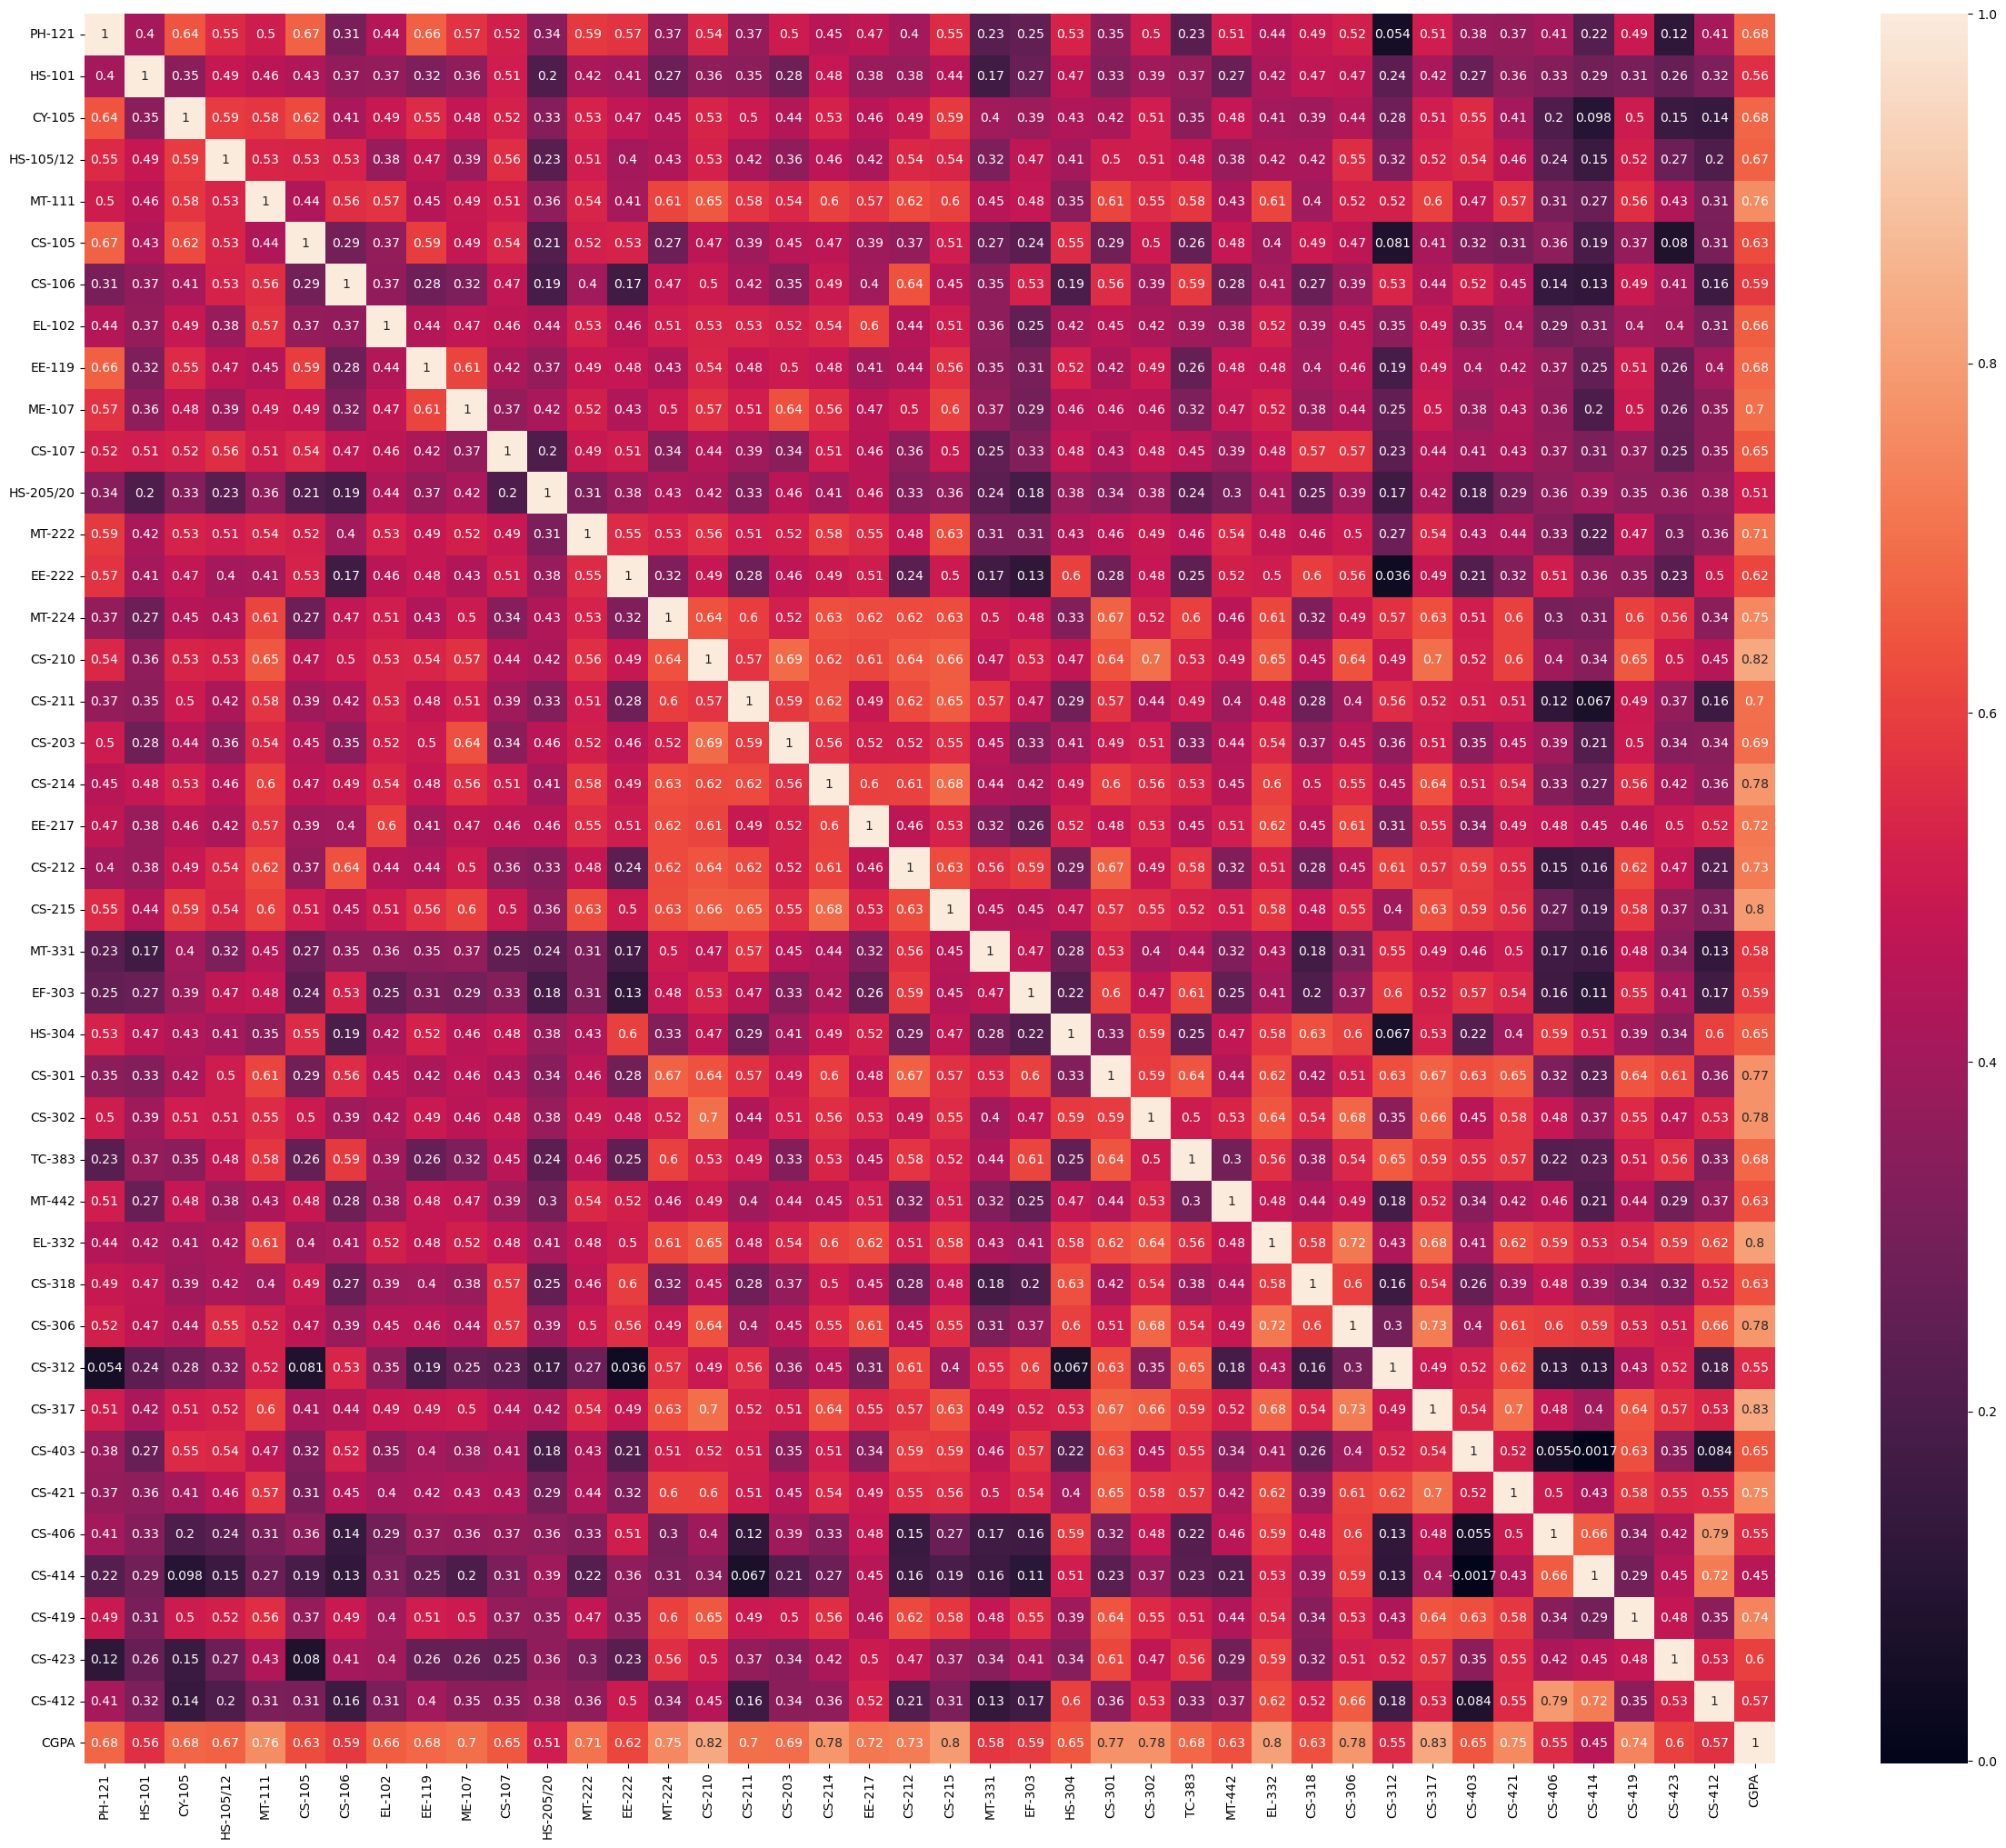

In [42]:
# Looking for correlations
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot = True)

In [50]:
x = df.drop(columns=['CGPA'])
y = df['CGPA']

In [52]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# data scaling 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [55]:
x_scaled

array([[-0.32798474, -1.35341922, -1.69941832, ..., -1.79817047,
         0.02337271,  0.57963789],
       [ 1.01119609, -1.79413913, -2.02447484, ..., -1.39336448,
        -1.10867952, -0.30798901],
       [ 1.01119609,  0.40946045,  0.7926817 , ...,  1.30534215,
         0.81580927,  0.96004941],
       ...,
       [-0.01894301,  1.51126024,  0.46762517, ...,  0.49573016,
         0.81580927,  0.57963789],
       [ 1.01119609,  0.85018036, -2.45788354, ..., -0.04401117,
        -0.31624296, -1.57602742],
       [-1.04908212, -1.79413913, -2.45788354, ...,  0.49573016,
        -2.24073175, -1.95643895]])

In [56]:
# lets split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

506    3.107
22     2.953
201    3.019
289    3.943
332    2.716
Name: CGPA, dtype: float64

In [57]:
regression = LinearRegression()
regression.fit(x_train,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values